<a href="https://colab.research.google.com/github/4elvis/Descriptive-Statistics-Project/blob/main/Descriptive_Statitics_Project%2CElvis_Mwangi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Table of contents**

1)Defining the question

2)Loading datasets and cleaning the data

3)Univariate Analysis

4)Bivariate Analysis

5)Multivariate Analysis


**1)Defining the question**

Introduction 
Business Understanding
Commenting on the data

**Defining the Question**:
How can a datascience company predict which individuals living in Kenya,Uganda and Rwanda, are willing to have a bank account.

**Defining the metrics for success**.
The findings will reveal the best sales strategy for banks hoping to explore the market in the named countries. Variables under research include: income, hpousehold size, marital status, level of education, age and the type of job the respondent works in.

**Experimental Design**. The study will rely on Correlational Study methods, describing the relationship between variables

**Relevance of the Data.** The data used was collected between the years 2016,2017 and 2018. It is therefore valid to fullfill the objectives of the study.

Introduction


In [82]:
#Loading the libraries to be used
#Importing libraries and running the data
import numpy as np
import pandas as pd
from subprocess import check_output
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the data

2)Loading the Datasets and Cleaning the data

In [137]:
#Reading the data
FinancialDatasets = pd.read_csv("http://bit.ly/FinancialDataset")

In [139]:
# Determining the no. of records in our dataset
print('This dataset has ' + str(FinancialDatasets.shape[0]) + ' rows, and ' + str(FinancialDataset.shape[1]) + ' columns')



This dataset has 23524 rows, and 13 columns


In [140]:
#A preview of the data set
FinancialDatasets.head(6)


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [141]:
# Previewing the bottom of our dataset
FinancialDatasets.tail(7)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23517,Uganda,2018,uniqueid_2110,No,Urban,Yes,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23518,Uganda,2018,uniqueid_2111,No,Rural,Yes,NaN,20.0,Female,Child,Single/Never Married,Primary education,No Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [142]:
# Checking whether each column has an appropriate datatype
dataTypeSeries=FinancialDatasets.dtypes
print('Data type of each column of Dataframe')
print(dataTypeSeries)

Data type of each column of Dataframe
country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object


In [143]:
#Describing the dataset
FinancialDatasets.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [144]:
#Checking for unique values in the dataset
FinancialDatasets.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [145]:
#Renaming some column names
FinancialDatasets  = FinancialDataset.rename(columns={"Type of Location":"Type_of_Location","Level of Educuation":"Level_of_Education", "Has a Bank account":"bank_Account","The relathip with head":"Household_position","Type of Job":"Job_status","Cell Phone Access":"Cell_phone"})
print(FinancialDatasets.head(6))

  country  year  ...               Level_of_Education                 Job_status
0   Kenya  2018  ...              Secondary education              Self employed
1   Kenya  2018  ...              No formal education       Government Dependent
2   Kenya  2018  ...  Vocational/Specialised training              Self employed
3   Kenya  2018  ...                Primary education  Formally employed Private
4   Kenya  2018  ...                Primary education        Informally employed
5   Kenya  2018  ...                Primary education        Informally employed

[6 rows x 13 columns]


In [146]:
#converting some categoerical values in the columns to numerical form
from sklearn.preprocessing import LabelEncoder
#Converting Bank Account,Gender of respondent, Household_position,level of education,Job_status, Cell phone and Country
print(FinancialDatasets["bank_Account"].unique())
print(FinancialDatasets['gender_of_respondent'].unique())
print(FinancialDatasets['Household_position'].unique())
print(FinancialDatasets['Level_of_Education'].unique())
print(FinancialDatasets['Job_status'].unique())
print(FinancialDatasets['Cell_phone'].unique())
print(FinancialDatasets['country'].unique())

['Yes' 'No' nan]
['Female' 'Male' nan]
['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives' nan]
['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6' nan]
['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' nan 'No Income']
['Yes' 'No' nan]
['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']


Data Cleaning

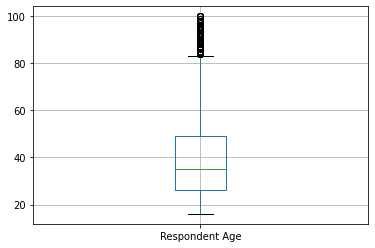

In [147]:
#Checking for outliers
#Checking for outliers for the Respondent Age column
FinancialDatasets.boxplot(["Respondent Age"])

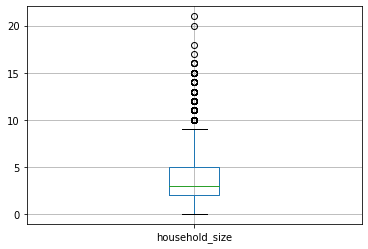

In [148]:
#checking for outliers for the household column
FinancialDatasets.boxplot(["household_size"])
print()

In [149]:
#Removing the outliers using z-score
#Removing outliers of the household column
from scipy import stats
z = np.abs(stats.zscore(FinancialDatasets['household_size']))
print(z)
#The output below concludes that the household data is constant and can be used. 

[nan nan nan ... nan nan nan]


In [150]:
#Removing outliers in Respondent Age
z = np.abs(stats.zscore(FinancialDatasets['Respondent Age']))
print(z)

[nan nan nan ... nan nan nan]


In [151]:
#Checking for Anomalies
q1_30 = FinancialDatasets['Respondent Age'].quantile(.25)
q3_30 = FinancialDatasets['Respondent Age'].quantile(.75)

iqr_30 = q3_30 - q1_30


q1_64 = FinancialDatasets['household_size'].quantile(.25)
q3_64 = FinancialDatasets['household_size'].quantile(.75)

iqr_64 = q3_64 - q1_64


In [152]:
#Identifying and Dealing with missing Data
# Identifying missing data
FinancialDatasets.isnull

# Dealing with the Missing Data
FinancialDatasets.fillna

<bound method DataFrame.fillna of       country  year  ...               Level_of_Education                 Job_status
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education              Self employed
23523  Uganda  2018  ...       

In [153]:
# More data cleaning procedures
FinancialDatasets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               23510 non-null  object 
 1   year                  23524 non-null  int64  
 2   uniqueid              23524 non-null  object 
 3   bank_Account          23488 non-null  object 
 4   Type_of_Location      23509 non-null  object 
 5   Cell_phone            23513 non-null  object 
 6   household_size        23496 non-null  float64
 7   Respondent Age        23490 non-null  float64
 8   gender_of_respondent  23490 non-null  object 
 9   Household_position    23520 non-null  object 
 10  marital_status        23492 non-null  object 
 11  Level_of_Education    23495 non-null  object 
 12  Job_status            23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


*The dataset can now be used to derive and predict solutions*

**EXPLORATORY ANALYSIS**

1)Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


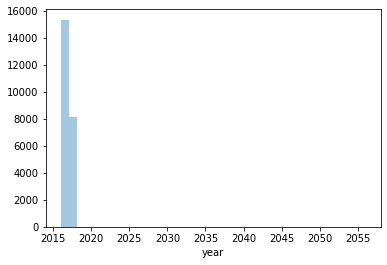

In [154]:
#Plotting the Univariate summaries 
# Ploting the univariate summaries and recording our observations
#Year  Summaries
sns.distplot(FinancialDatasets.year.dropna(), kde=False, bins = 39);
#From the graph below, the data is positively skewed revealing that the mean is less than the mode. It means that as the years progress the distribution of individuals willling to have a bank account has increased.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

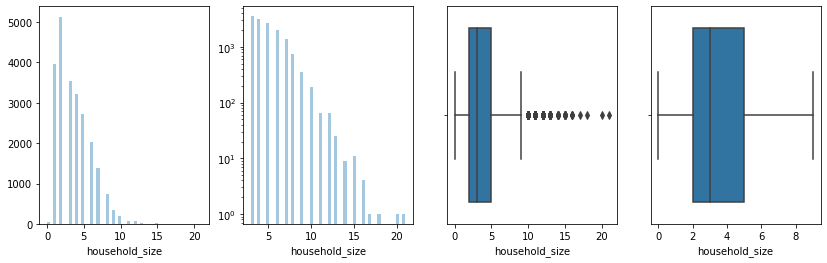

In [100]:
#Household Size Summaries
household_sizefig, axs = plt.subplots(ncols = 4, figsize=(14, 4))

sns.distplot(FinancialDatasets.household_size.dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(FinancialDataset.household_size.dropna()[FinancialDatasets.household_size > 2], kde=False, ax=axs[1])
sns.boxplot(FinancialDatasets. household_size, ax=axs[2], orient = 'v')
sns.boxplot(FinancialDatasets.household_size, ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')
#The data is skewed positively. The number of households has been reducing.

The number of households has been reducing.This is likely to suggest that income will be affected due to reduced household expenses.

In [155]:
#Respondent Age Summaries
FinancialDatasets["Respondent Age"].kurt()
print(FinancialDatasets["Respondent Age"].kurt())
#The data has a positive kurtosis. 

0.10110811880734305


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


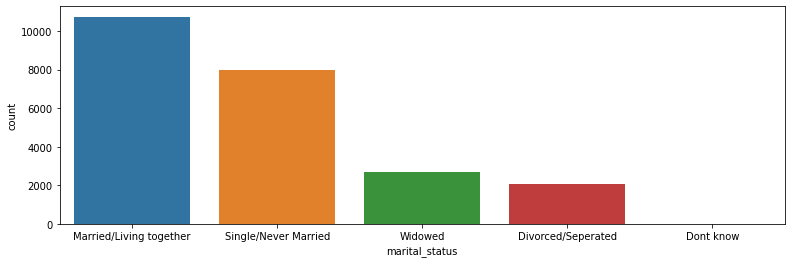

In [102]:
#Marital status summaries
plt.figure(figsize=(13, 4))
sns.countplot(FinancialDatasets.marital_status.dropna(), order = FinancialDatasets.marital_status.value_counts().index);
#As seen by the blue bar, most of the respondents were married and living together with their spouses.

The bank should target married couples as they rank higher in comparison with other marital statuses.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


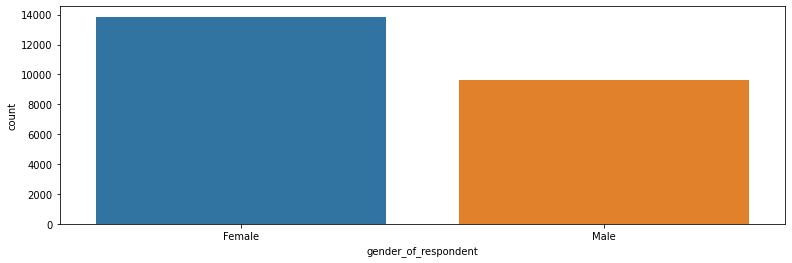

In [103]:
#Type of Gender of Respondent
plt.figure(figsize=(13, 4))
sns.countplot(FinancialDatasets.gender_of_respondent.dropna(), order = FinancialDatasets.gender_of_respondent.value_counts().index);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


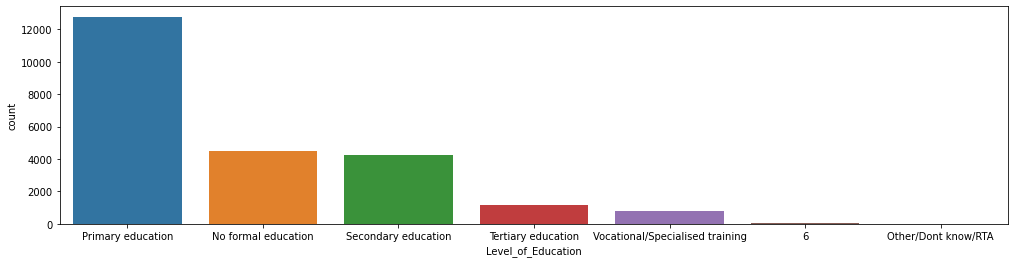

In [104]:
#Level of Education Summaries
plt.figure(figsize=(17, 4))
sns.countplot(FinancialDatasets.Level_of_Education.dropna(), order = FinancialDatasets.Level_of_Education.value_counts().index);
#The level of education suggests some reasons as to why some of the individuals prefer not having bank accounts. The banks should therefore employ simple and easy to understand marketing tactics.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


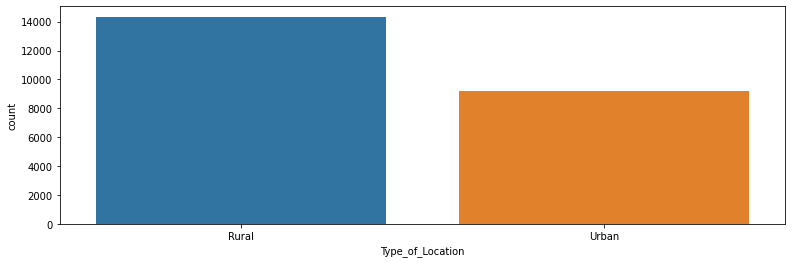

In [105]:
#Location Summaries
plt.figure(figsize=(13, 4))
sns.countplot(FinancialDatasets.Type_of_Location.dropna(), order = FinancialDatasets.Type_of_Location.value_counts().index);
#Most of the respondents are living in Rural Areas.The banks should therefore come up with strategies to venture in the rural areas, buidling branches that make their banking services accessible.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


No     20179
Yes     3309
Name: bank_Account, dtype: int64

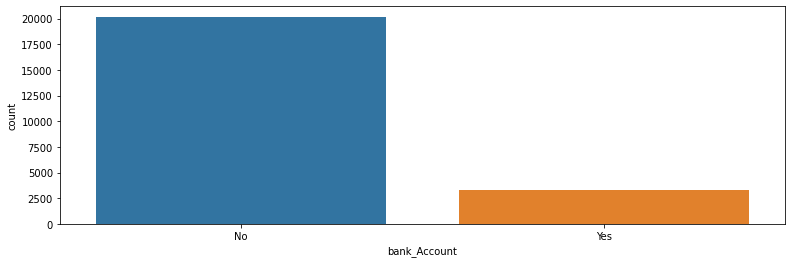

In [106]:
#Plotting count vs bank account
plt.figure(figsize=(13, 4))
sns.countplot(FinancialDatasets.bank_Account.dropna(), order = FinancialDatasets.bank_Account.value_counts().index);
#The population of individuals without bank accounts in the region is signifacantly higher.The banks should therefore penetrate the new market.
FinancialDatasets['bank_Account'].value_counts()
#The number of individuals with bank accounts(3309)is significantly lower than those without(20179)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


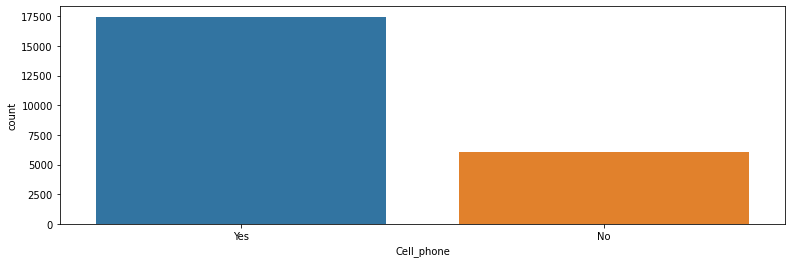

In [107]:
#Mobile phone summaries Cell Phone Access
plt.figure(figsize=(13, 4))
sns.countplot(FinancialDatasets.Cell_phone.dropna(), order = FinancialDatasets.Cell_phone.value_counts().index);
#The number of individuals with mobile phones is high suggesting that mobile banking in the region would be an easy fit.

The number of individuals with mobile phones is high suggesting that mobile banking in the region would be an easy fit.

**Recomendations**

1)The banks should consider the level of education of the respondent when designing marketing techniques.


2)A large population lives in the rural area hinting an infrastructure upgrade such as more banking halls in such regions.

3)When designing bank account packages, the banks should consider a couple's package in regard to their large population.

4)The region is a raw market to venture in.

4. **Bivariate Analysis Summaries**

Numerical vs Numerical Data

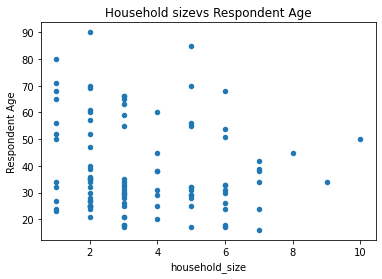

In [108]:
#Household size vs The Respondent Age
FinancialDatasets[FinancialDatasets['household_size'] < 100].sample(100).plot.scatter(x='household_size', y='Respondent Age')
plt.title('Household sizevs Respondent Age')
plt.show()
#The is a notable presence of outliers in the data. Respondnents who were elderly were living in a smaller household size compared to the younger respondnents.

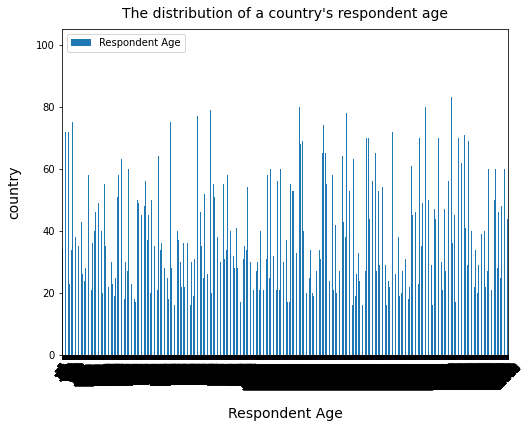

In [109]:
#Country vs the Respondnent Age
FinancialDatasets[['Respondent Age', 'country']].plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)
plt.title("The distribution of a country's respondent age", fontsize=14, y=1.015)
plt.ylabel("country", fontsize=14, labelpad=15)
plt.xlabel("Respondent Age", fontsize=14, labelpad=15)
plt.show()

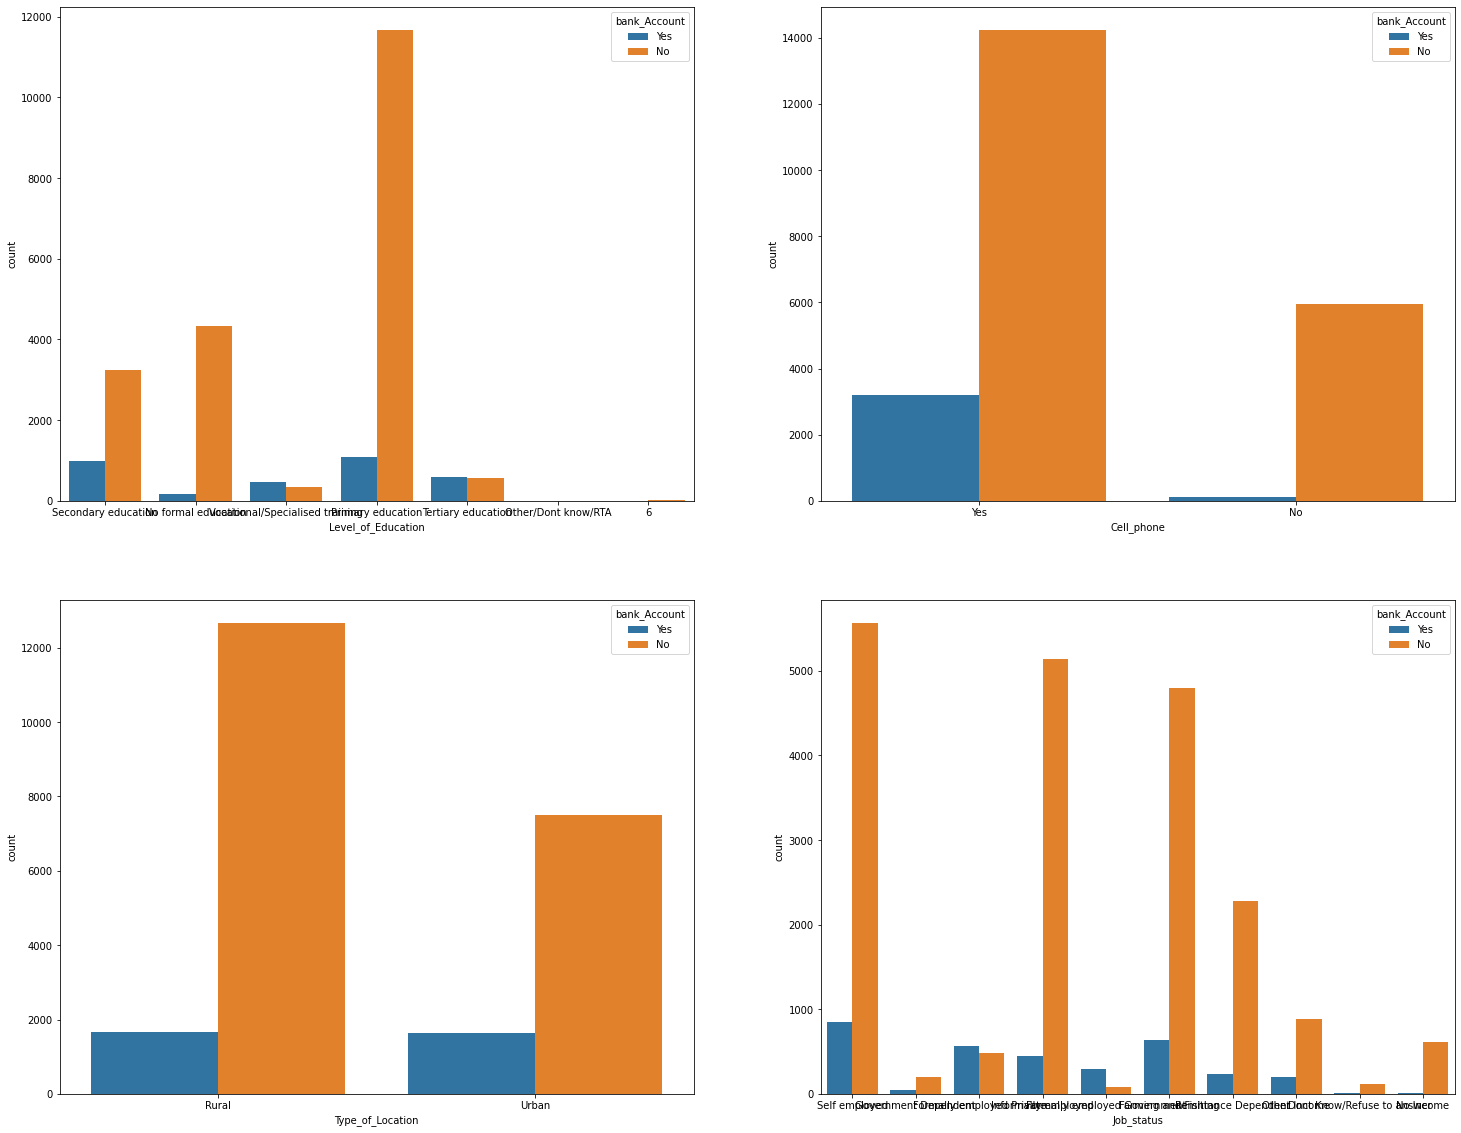

In [132]:
#Plotting a relationship between bank account and variables such as cell phone acces, Household position, Level of education and Location
fig,axes = plt.subplots(2,2, figsize=(25,20))
sns.countplot(x='Level_of_Education',hue='bank_Account',data=FinancialDatasets,ax=axes[0,0])
sns.countplot(x='Cell_phone',hue='bank_Account',data=FinancialDatasets,ax=axes[0,1])
sns.countplot(x='Type_of_Location',hue='bank_Account',data=FinancialDatasets,ax=axes[1,0])
sns.countplot(x='Job_status',hue='bank_Account',data=FinancialDatasets,ax=axes[1,1])

From the above bar charts,a large population of individuals: having a lower education background have no bank accounts, own cell phones making mobile money a viable altertanative and live in the rural areas.The self employed population has the largest percentage of people with no bank accounts.

In [111]:
# Checking how our varibales are corelated using a matrix
corrMatrix = FinancialDatasets.corr()
corrMatrix

,year,household_size,Respondent Age
year,1.000000,-0.049344,-0.019570
household_size,-0.049344,1.000000,-0.119709
Respondent Age,-0.019570,-0.119709,1.000000


A negatively correlated matrix between the respondent age and the household size suggest that the region has adapted to a new liking to smaller family units.

**Recomendations**
1)The rural region has a large population with no bank accounts suggesting an infrastructure upgrade.
2)Most of the self employed individuals do not have a bank account suggesting information gaps on the savings package.
3)A partnership with mobile service providers would help lure individuals who have cell phone access to try and open mobile banking accounts.

# 5. Multivariate Analysis


In [133]:
#Describing the dataset
FinancialDatasets.describe()
#From the data below, 

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [180]:
dataTypeSeries=FinancialDatasets.dtypes
print(dataTypeSeries)

country                  object
year                      int64
uniqueid                 object
bank_Account              int64
Type_of_Location          int64
Cell_phone                int64
household_size          float64
Respondent Age          float64
gender_of_respondent      int64
Household_position       object
marital_status           object
Level_of_Education       object
Job_status               object
dtype: object


In [158]:
#Converting columns that contain strings into numerical data
#bank_Account
FinancialDatasets["bank_Account"] = np.where(FinancialDatasets["bank_Account"].str.contains("Yes", "No"), 1, 0)
FinancialDatasets.head()

,country,year,uniqueid,bank_Account,Type_of_Location,Cell_phone,household_size,Respondent Age,gender_of_respondent,Household_position,marital_status,Level_of_Education,Job_status
0,Kenya,2018,uniqueid_1,1,1,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,1,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,0,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,1,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,0,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [159]:
#Cell Phone
FinancialDatasets["Cell_phone"] = np.where(FinancialDatasets["Cell_phone"].str.contains("Yes", "No"), 1, 0)
FinancialDatasets.head()

,country,year,uniqueid,bank_Account,Type_of_Location,Cell_phone,household_size,Respondent Age,gender_of_respondent,Household_position,marital_status,Level_of_Education,Job_status
0,Kenya,2018,uniqueid_1,1,1,1,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,1,0,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,0,1,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,1,1,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,0,0,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


Correlation Analysis

In [164]:
#Calculating the correlation 
corrMatrix = FinancialDatasets.corr()
corrMatrix 


,year,bank_Account,Type_of_Location,Cell_phone,household_size,Respondent Age
year,1.000000,0.109215,-0.204189,-0.060639,-0.049344,-0.019570
bank_Account,0.109215,1.000000,-0.088328,0.207941,-0.024886,0.018467
Type_of_Location,-0.204189,-0.088328,1.000000,0.084868,0.274087,0.047518
Cell_phone,-0.060639,0.207941,0.084868,1.000000,0.098698,-0.103868
household_size,-0.049344,-0.024886,0.274087,0.098698,1.000000,-0.119709
Respondent Age,-0.019570,0.018467,0.047518,-0.103868,-0.119709,1.000000


<function matplotlib.pyplot.show>

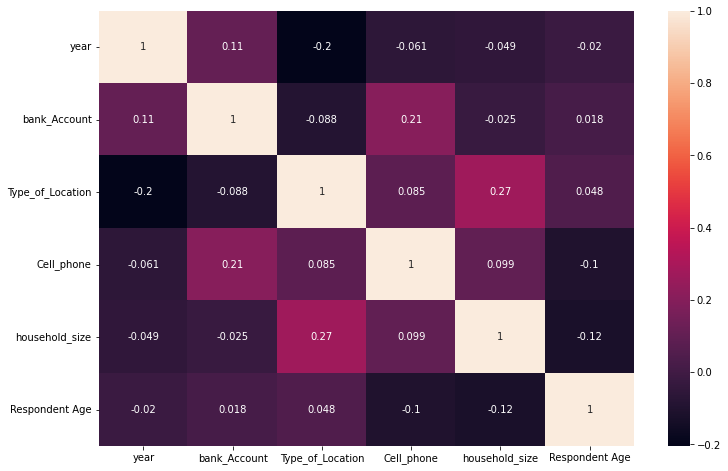

In [161]:
#Conducting coreelation analysis on the data
plt.figure(figsize=(12, 8))
sns.heatmap(FinancialDatasets.corr(),annot=True)
plt.show


The heatmap above has a mixture of variables that have  positive and negative correlation. The positive correlation between the bank account and year reflects on an increase of individuals taking up bank accounts. It is also positively correlated with the population of individuals who own mobile phones suggesting a posibility of a positive perfomance should mobile banking be introduced. Cell phone access is negatively corrrelated with the respondent age suggesting that a further analysis should be undertaken when introducing mobile banking.It may also suggest that individuals prefer walking into banking halls. The region also promotes mobile banking through a positive correlation between the location and cell phone access.

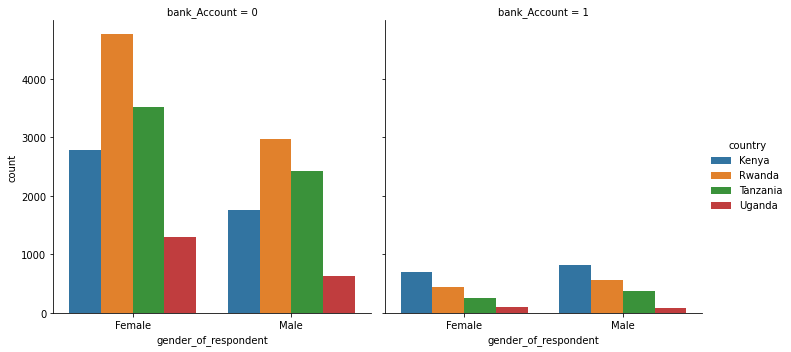

In [162]:
#A comparison between bank accounts  and different countries
#Finding how different countries and gender arerelated to account opening

sns.catplot(data=FinancialDatasets,col = "bank_Account",x = "gender_of_respondent", hue="country",kind = "count")



Considering 1 represents individuals with bank accounts, Kenya is the leading country followed by Rwanda. Their is also a huge market gap between individuals with bank accounts and those without. 

**Recomendations**

i)Mobile banking would be the best strategy to help individuals across the region to open bank accounts.

ii)A partnership between mobile service providers and the banking industry would be financially viable.

iii)Buidling banking halls in the rural areas will encourage a large population to open bank accounts.

iii)The respondent age should be a variable when picking marketing techniques.

**Linear Discriminant Analysis**

In [171]:
#Viewing the current dataset
FinancialDatasets.head(5)

,country,year,uniqueid,bank_Account,Type_of_Location,Cell_phone,household_size,Respondent Age,gender_of_respondent,Household_position,marital_status,Level_of_Education,Job_status
0,Kenya,2018,uniqueid_1,1,1,1,3.0,24.0,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,1,0,5.0,70.0,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,0,1,5.0,26.0,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,1,1,5.0,34.0,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,0,0,8.0,26.0,1,Child,Single/Never Married,Primary education,Informally employed


In [181]:
#Droping the columns that have strings
FinancialDatasets.drop(['country','year','uniqueid',  'Household_position','Level_of_Education','Job_status','marital_status'],axis=1,inplace=True)
#preview of the data
FinancialDatasets.head()

,bank_Account,Type_of_Location,Cell_phone,household_size,Respondent Age,gender_of_respondent
0,1,1,1,3.0,24.0,0
1,0,1,0,5.0,70.0,0
2,1,0,1,5.0,26.0,1
3,0,1,1,5.0,34.0,0
4,0,0,0,8.0,26.0,1


In [182]:
#We split our dataset into two:features and labels
#The dependent variable in this case is x=has a bank account and y= does not have a bank account
X = FinancialDatasets.iloc[:,1:6].values
y = FinancialDatasets.iloc[:, 1].values 

In [183]:
#The following code divides data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [185]:
#  Feature scaling process
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [187]:
#perform LDA with Scikit-Learn. 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

ValueError: ignored

Principal Component Analysis